In [2]:
!pip install opencv-python==4.9.0.80
!pip install numpy
!pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76


In [12]:
# ray tracing algorithm
# for each pixel {
# compute viewing ray
# intersect ray with scene
# compute illumination at visible point
# put result into image
# }

#참조
# Surface s =new Sphere((0.0, 0.0, 0.0), 1.0);
# for 0 <=iy <ny
# for 0 <=ix <nx {
# ray =camera.getRay(ix, iy);
# hitSurface, t =s.intersect(ray, 0, +inf)
# if hitSurface is not null
# image.set(ix, iy, white);
# }




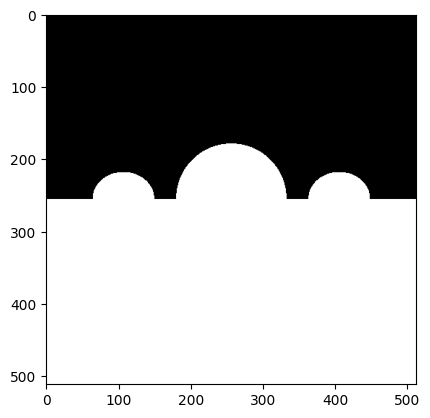

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def glNormalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm

def glCreateRay(o, d):
    return {'origin': o, 'direction': glNormalize(d)}

# 구와 광선의 교차 여부 및 교차점 계산 함수
def SphereIntersect(ray, center, radius):
    oc = ray['origin'] - center
    a = np.dot(ray['direction'], ray['direction'])
    half_b = np.dot(oc, ray['direction'])
    c = np.dot(oc, oc) - radius * radius
    discriminant = half_b * half_b - a * c
    if discriminant > 0:
        root = np.sqrt(discriminant)
        temp = (-half_b - root) / a
        if temp > 0:
            return True, temp
    return False, None

# 평면과 광선의 교차 여부 및 교차점 계산 함수
def PlaneIntersect(ray, position):
    denominator = np.dot(ray['direction'], np.array([0, 1, 0]))
    if abs(denominator) > 1e-6:
        t = (position[1] - ray['origin'][1]) / denominator
        if t >= 0:
            return True, t
    return False, None

# 장면 렌더링 함수
def renderScene():
    img = np.zeros((512, 512, 3), dtype=np.uint8)
    camera_pos = np.array([0, 0, 0])
    objects = [
        {'type': 'plane', 'position': np.array([0, -2, 0])},
        {'type': 'sphere', 'center': np.array([-4, 0, -7]), 'radius': 1},
        {'type': 'sphere', 'center': np.array([0, 0, -7]), 'radius': 2},
        {'type': 'sphere', 'center': np.array([4, 0, -7]), 'radius': 1},
    ]

    for y in range(512):
        for x in range(512):
            u = (x / 512) * 2 - 1  # 화면의 가로 위치 계산
            v = ((512 - y - 1) / 512) * 2 - 1  # 화면의 세로 위치 계산 (상하 반전 포함)
            ray = glCreateRay(camera_pos, np.array([u, v, -1]) - camera_pos)  # 카메라 위치에서 광선 생성
            closest = float('inf')  # 가장 가까운 교차점을 찾기 위한 변수 초기화
            for obj in objects:  # 모든 객체에 대해 교차 검사
                hit = False
                if obj['type'] == 'sphere':  # 객체가 구인 경우
                    hit, t = SphereIntersect(ray, obj['center'], obj['radius'])
                elif obj['type'] == 'plane':  # 객체가 평면인 경우
                    hit, t = PlaneIntersect(ray, obj['position'])
                if hit and t < closest:  # 가장 가까운 교차점 업데이트
                    closest = t
                    img[y, x] = [255, 255, 255]  # 교차점에 흰색 픽셀로 표시

    plt.imshow(img)  # 생성된 이미지 표시
    plt.show()  # 이미지 출력

renderScene()  # 장면 렌더링 함수 호출

